# Reading data from the Netcdf database using the netCDF4 module

<i>Â© Felix Matt, University of Oslo</i>

**At the current state of development SHyFT supports two  database types**:
- Statkraft internal database ("orchestration"); very limited access
- NETCDF database ("orchestration2")

This Notebook gives an introduction to the structure and usage of the **SHyFT NETCDF database**!


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt # for plotting
from netCDF4  import Dataset # for handling netCDF files
import os # using operating system dependent functionality

NETCDF database files
===========

In [2]:
# path to the dataset files
data_path = os.path.abspath(os.path.realpath('atnsjoen_catchment/data/'))

####The NETCDF-database exists of three files:
1. Meteorological station data (observations or numerical weather forecast)
2. Discharge station data (typically observations)
3. Cell data

In [3]:
for filename in os.listdir(data_path):
    print(filename)

atnsjoen_cell_info.nc
atnsjoen_discharge.nc
atnsjoen_met.nc


##1. Meteorological observations

###Different stations are organized using netcdf-GROUPS
###Each GROUP holds VARIABLES ...

In [4]:
fn_met = "atnsjoen_met.nc"
file_path = os.path.join(data_path,fn_met)

# opening the file and print the station names
with Dataset(file_path) as dset:
    for gr_key in dset.groups.keys():
        print(gr_key + ':')
        for var_key in dset.groups[gr_key].variables.keys():
            print('   -'+var_key)

ATNDALEN-ERIKSRUD:
   -time
   -precipitation
fake_relative_humidity:
   -time
   -relative_humidity
libru_nve:
   -time
   -temperature
fake_wind_speed:
   -time
   -wind_speed
WFDEI_station4:
   -time
   -radiation
atnsjoen_nve:
   -time
   -temperature
WFDEI_station1:
   -time
   -radiation
WFDEI_station2:
   -time
   -radiation
WFDEI_station3:
   -time
   -radiation
ATNSJOEN:
   -time
   -precipitation


Plotting a group-variabe:

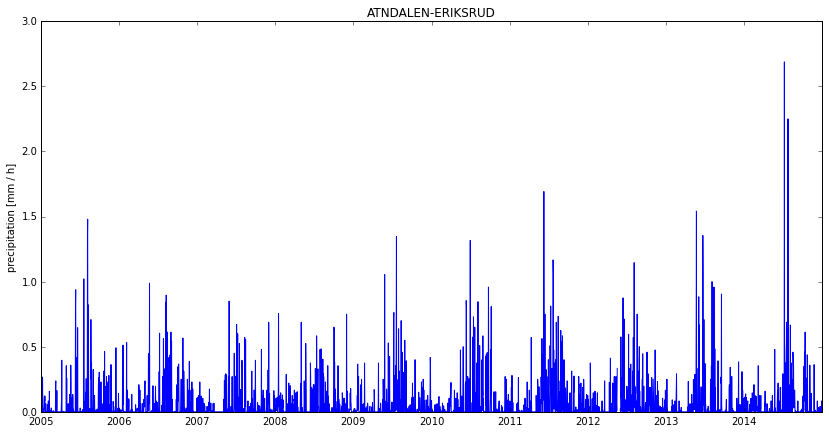

In [5]:
import datetime
with Dataset(file_path) as dset:    
    time = dset.groups["ATNDALEN-ERIKSRUD"].variables['time'][:]
    precip = dset.groups["ATNDALEN-ERIKSRUD"].variables['precipitation'][:]
    
dates = [datetime.datetime.utcfromtimestamp(t) for t in time]
plt.figure(figsize=[14,7])
plt.plot(dates, precip)
plt.ylabel('precipitation [mm / h]') # input for accumulated variables PER HOUR!
plt.title("ATNDALEN-ERIKSRUD")

####EXERCISE 1: Plot the time series of the "libru_nve"-station

In [6]:
with Dataset(file_path) as dset:
    pass
    #time = dset.groups.....
    #temperature = dset.groups....

###Additionally, every group holds ATTRIBUTES which inform about the station's location.

In [7]:
with Dataset(file_path) as dset:
    group = dset.groups["ATNDALEN-ERIKSRUD"]
    print("ATTRIBUTES:")
    print("  ","EPSG coordinate system:", group.EPSG)
    print("  ","station's x-coord:", group.x)
    print("  ","station's y-coord:", group.y)
    print("  ","station's elevation:", group.z, "in", group.z_unit)

ATTRIBUTES:
   EPSG coordinate system: 32633
   station's x-coord: 239463.796037
   station's y-coord: 6881084.41483
   station's elevation: 731.0 in masl


##Discharge observations
### used for calibration and evaluation of simulations

In [8]:
fn_met = "atnsjoen_discharge.nc"
file_path = os.path.join(data_path,fn_met)

# opening the file and print the station names
with Dataset(file_path) as dset:
    for gr_key in dset.groups.keys():
        print(gr_key + ':')
        for var_key in dset.groups[gr_key].variables.keys():
            print('   -'+var_key)

atnsjoen:
   -time
   -discharge


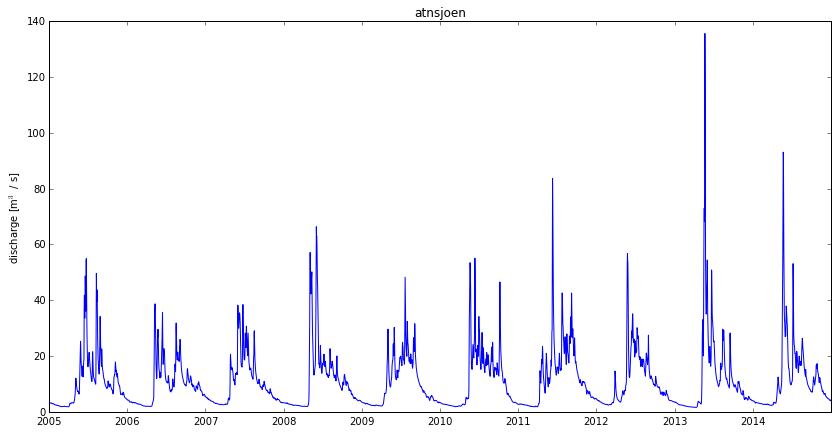

In [9]:
import datetime
with Dataset(file_path) as dset:    
    time = dset.groups["atnsjoen"].variables['time'][:]
    precip = dset.groups["atnsjoen"].variables['discharge'][:]
    
dates = [datetime.datetime.utcfromtimestamp(t) for t in time]
plt.figure(figsize=[14,7])
plt.plot(dates, precip)
plt.ylabel('discharge [m$^3$ / s]')
plt.title("atnsjoen")

##Static cell data
### used for calibration and evaluation of simulations

In [10]:
fn_met = "atnsjoen_cell_info.nc"
file_path = os.path.join(data_path,fn_met)

# opening the file and print the station names
with Dataset(file_path) as dset:
    for gr_key in dset.groups.keys():
        print(gr_key + ':')
        for var_key in dset.groups[gr_key].variables.keys():
            print('   -'+var_key)

elevation:
   -xcoord
   -ycoord
   -elevation
forest-fraction:
   -xcoord
   -ycoord
   -forest-fraction
lake-fraction:
   -xcoord
   -ycoord
   -lake-fraction
glacier-fraction:
   -xcoord
   -ycoord
   -glacier-fraction
catchments:
   -xcoord
   -ycoord
   -catchments
   -catchment_indices
   -catchment_names
reservoir-fraction:
   -xcoord
   -ycoord
   -reservoir-fraction


###Plotting the elevation the elevation

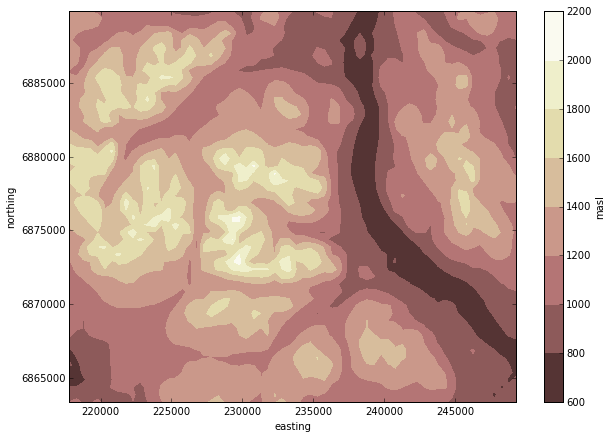

In [11]:
import matplotlib as mpl
with Dataset(file_path) as dset:
    x_vector = dset.groups['elevation'].variables['xcoord'][:]
    y_vector = dset.groups['elevation'].variables['ycoord'][:]
    elevation = dset.groups['elevation'].variables['elevation'][:]
plt.figure(figsize=(10,7))
plt.contourf(x_vector,y_vector,elevation,cmap=mpl.cm.get_cmap('pink'))
plt.xlabel("easting")
plt.ylabel("northing")
cb = plt.colorbar()
cb.set_label('masl')

###Plotting the elevation the catchment

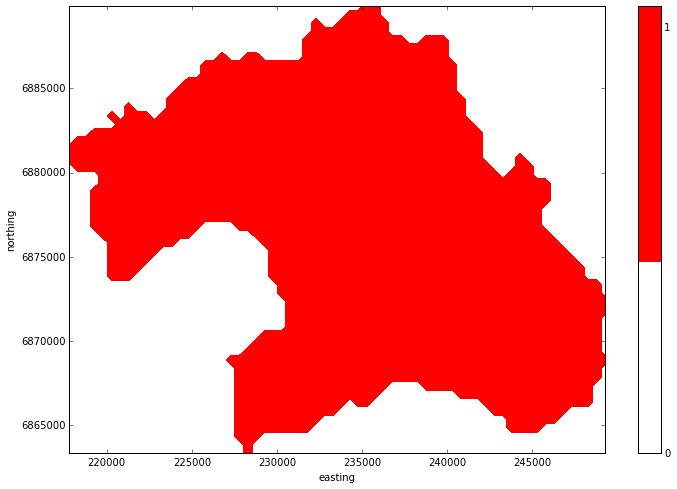

In [13]:
from matplotlib import colors
with Dataset(file_path) as dset:
    x_vector = dset.groups['catchments'].variables['xcoord'][:]
    y_vector = dset.groups['catchments'].variables['ycoord'][:]
    elevation = dset.groups['catchments'].variables['catchments'][:]

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'red'])
bounds=[0.0,0.5,1.0]
norm = colors.BoundaryNorm(bounds, cmap.N)

# plot
plt.figure(figsize=(12,8))
fig = plt.contourf(x_vector,y_vector,elevation,cmap=cmap, norm=norm)
plt.xlabel('easting')
plt.ylabel('northing')
# make color bar
plt.colorbar(fig, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0., 1.0])

####EXERCISE 2:
* Calculate the size of the cells (x and y)
* Use the variables "catchment_indices" and "catchment_names" of the group "catchments" to find out about the mapping between the discharge timeseries and the associated catchment area.